In [20]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns


In [21]:
sb = "/Users/cale_/Downloads/superbowl.csv"
df = pd.read_csv(sb)
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Margin
0,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,11
1,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,10
2,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,8
3,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,6
4,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,14


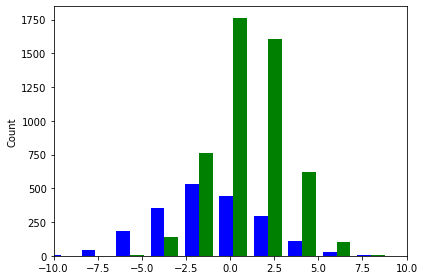

In [3]:
Winner_Pts = np.random.normal(-1, 3, 2000)
Loser_Pts = np.random.normal(1, 2, 5000)

colors = ['b','g']
density = True

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([Winner_Pts, Loser_Pts],color=colors)
ax1.set_xlim(-10, 10)
ax1.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [4]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [5]:
stats = return_statistics(df, 'Winner', 'Winner Pts')
print(stats.head(15))

                  Winner  mean Winner Pts  std in Winner Pts
9    San Francisco 49ers        37.600000          14.808781
4    Washington Redskins        35.333333           7.637626
12      Baltimore Ravens        34.000000           0.000000
0      Green Bay Packers        33.500000           1.914854
6         Dallas Cowboys        32.000000          11.379807
14        Denver Broncos        29.666667           5.131601
18       Oakland Raiders        29.500000           3.535534
20    Kansas City Chiefs        27.000000           5.656854
21  New England Patriots        25.166667           7.859177
10   Pittsburgh Steelers        25.166667           7.111024
1        New York Giants        24.250000           9.979145
11        Miami Dolphins        19.000000           7.071068


In [6]:


def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    plt.scatter(df_new['Date'], df_new[numerical_column])
    plt.xlabel('Date')
    plt.ylabel(numerical_column)

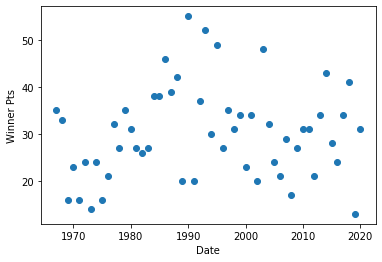

In [7]:
get_histogram(df, 'Winner Pts')


['New England Patriots', 'Pittsburgh Steelers', 'Dallas Cowboys', 'San Francisco 49ers', 'New York Giants']


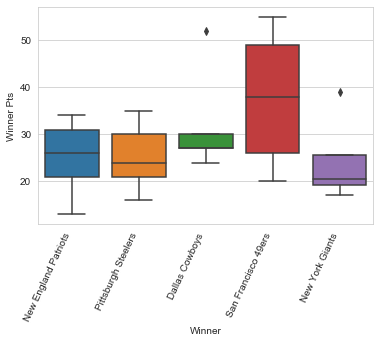

In [8]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    
    df_new = df[df[categorical_column].isin(keys)]
  
    sns.set_style("whitegrid") 
  
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column], order=["New England Patriots", "Pittsburgh Steelers", "Dallas Cowboys", "San Francisco 49ers", "New York Giants"])
    plt.xticks(rotation=65, horizontalalignment='right')

get_boxplot_of_categories(df, 'Winner', 'Winner Pts', 5)


In [30]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    
    df_new = df[df[categorical_column].isin(keys)]
  
    sns.set_style("whitegrid") 
  
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column], order=["New England Patriots", "Denver Broncos", "Minnesota Vikings", "Buffalo Bills", "Miami Dolphins"])
    plt.xticks(rotation=65, horizontalalignment='right')

get_boxplot_of_categories(df, 'Loser', 'Loser Pts', 5)

NameError: name 'Counter' is not defined

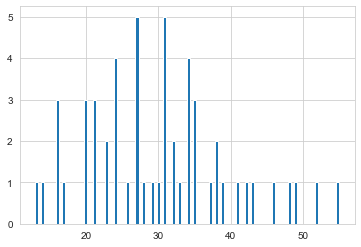

In [10]:

def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=100)
get_histogram(df, 'Winner Pts')


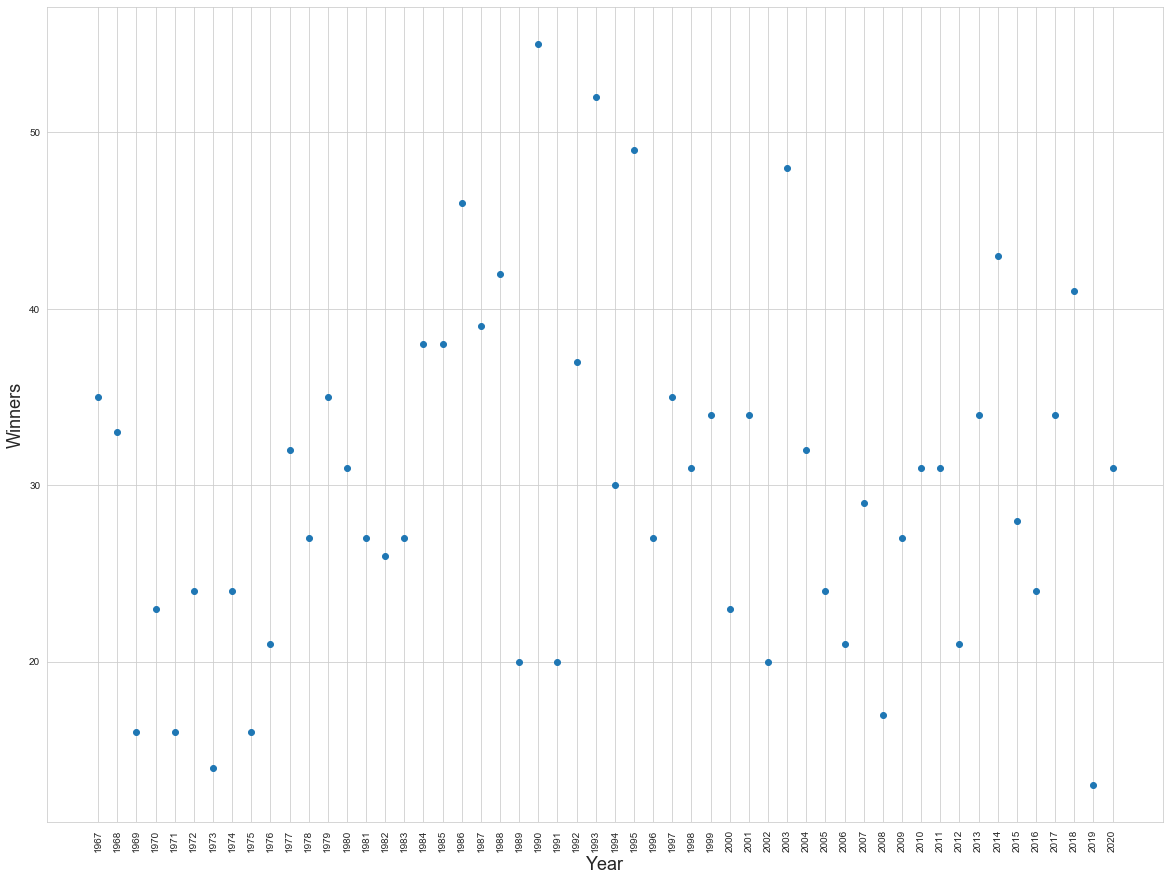

In [18]:
year = df.iloc[:,0]
winnerz = df.iloc[:,3]
plt.figure(figsize=(20,15))
plt.scatter(year, winnerz)
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Winners', fontsize=18)
plt.show()

In [26]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, winnerz)
vc_fit = vc_slope * year + vc_int

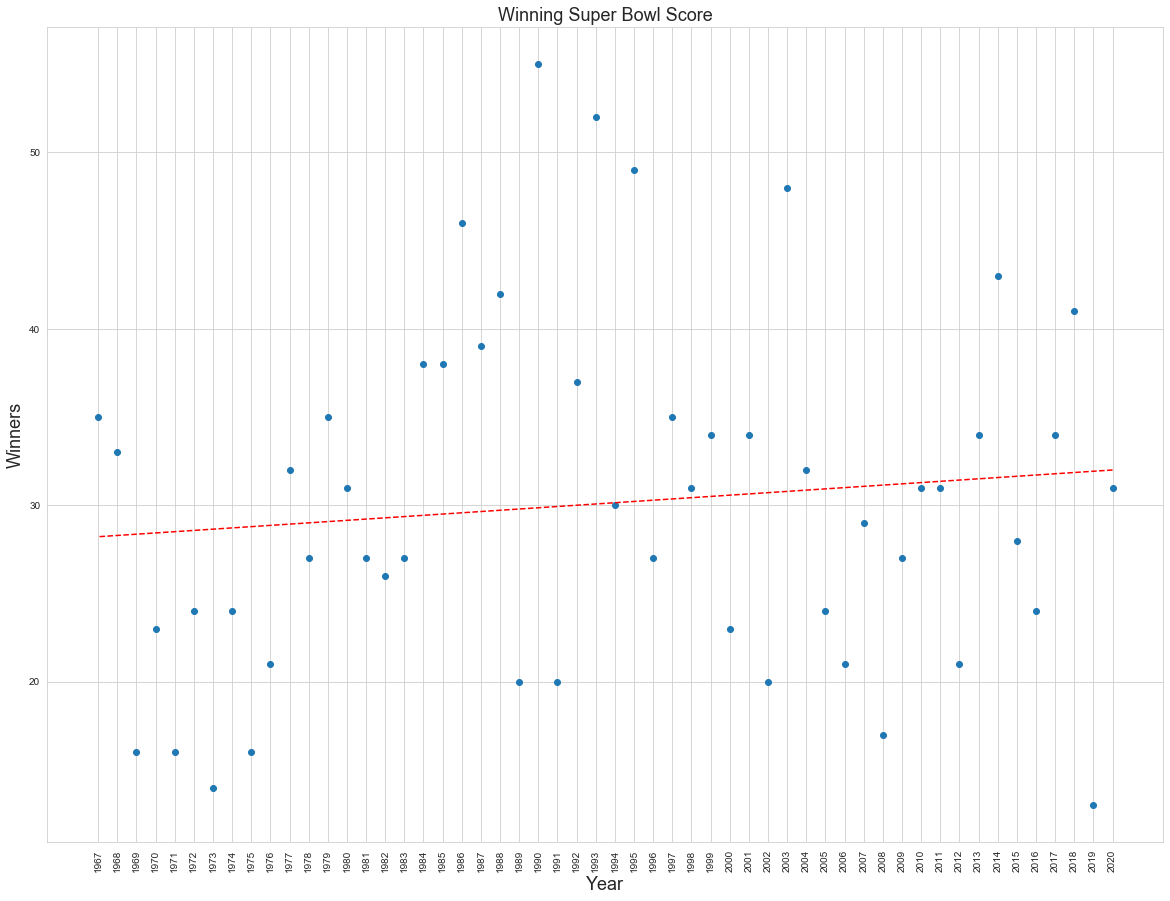

In [27]:
year = df.iloc[:,0]
winnerz = df.iloc[:,3]
plt.figure(figsize=(20,15))
plt.scatter(year, winnerz)
plt.title("Winning Super Bowl Score", fontsize=18)
plt.plot(year,vc_fit,"--", color="red")
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Winners', fontsize=18)
plt.show()

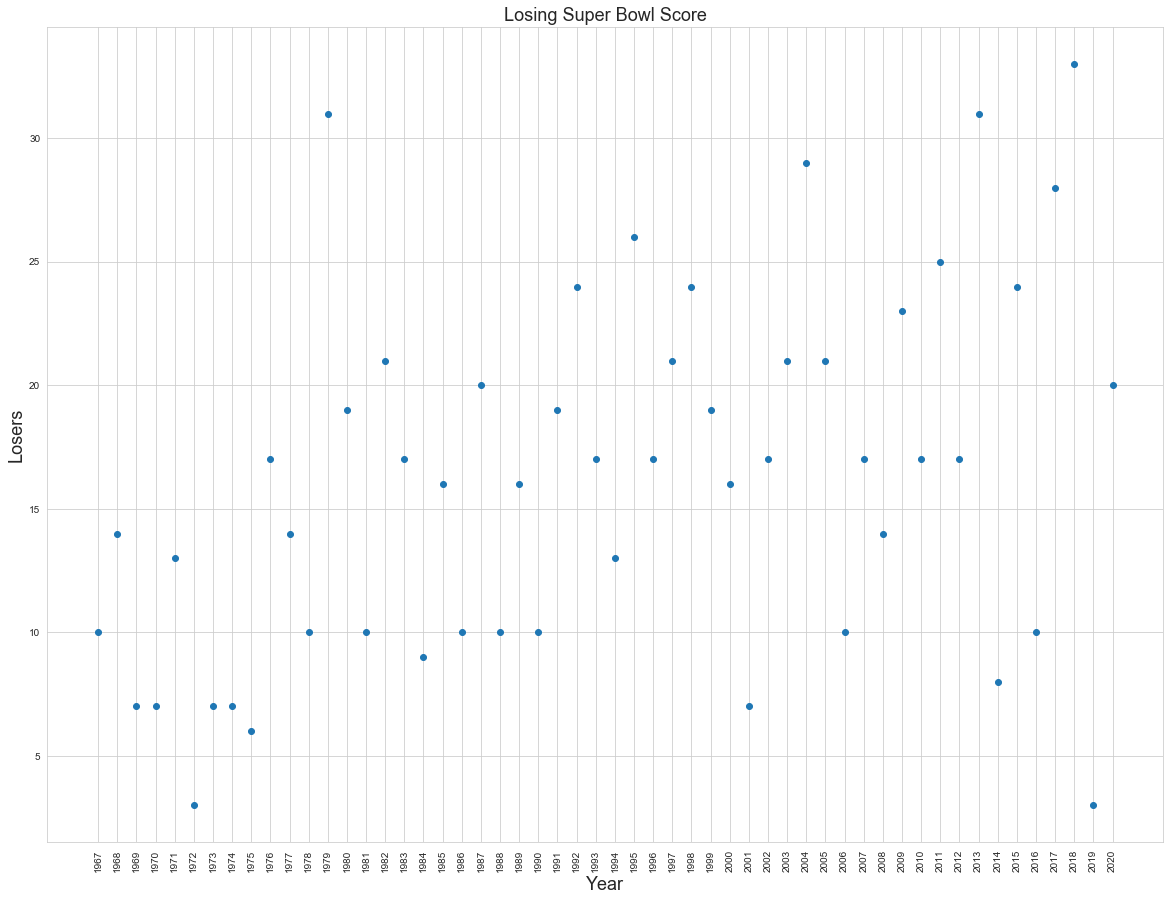

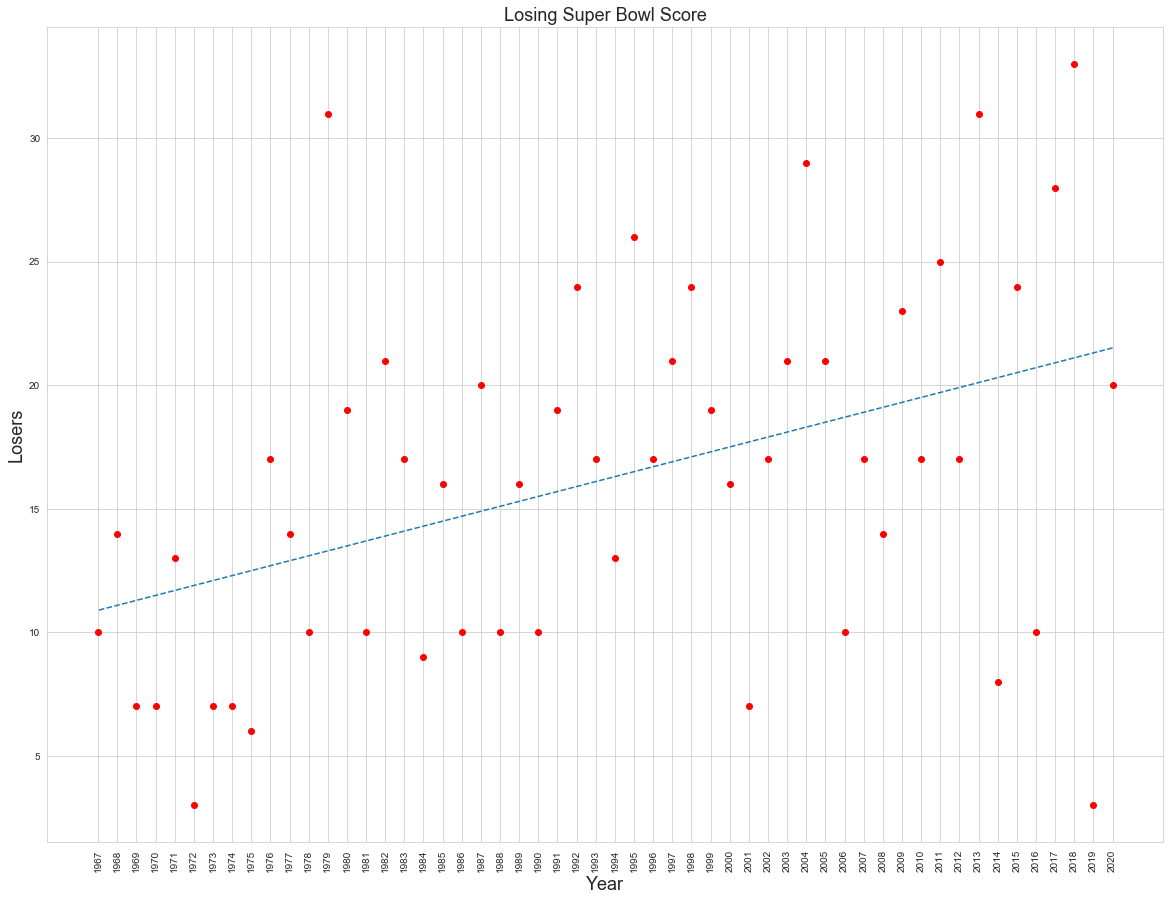

In [24]:
year = df.iloc[:,0]
loserz = df.iloc[:,5]
plt.figure(figsize=(20,15))
plt.scatter(year, loserz)
plt.title("Losing Super Bowl Score", fontsize=18)
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Losers', fontsize=18)
plt.show()

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, loserz)
vc_fit = vc_slope * year + vc_int

year = df.iloc[:,0]
loserz = df.iloc[:,5]
plt.figure(figsize=(20,15))
plt.scatter(year, loserz, color="red")
plt.title("Losing Super Bowl Score", fontsize=18)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Losers', fontsize=18)
plt.show()

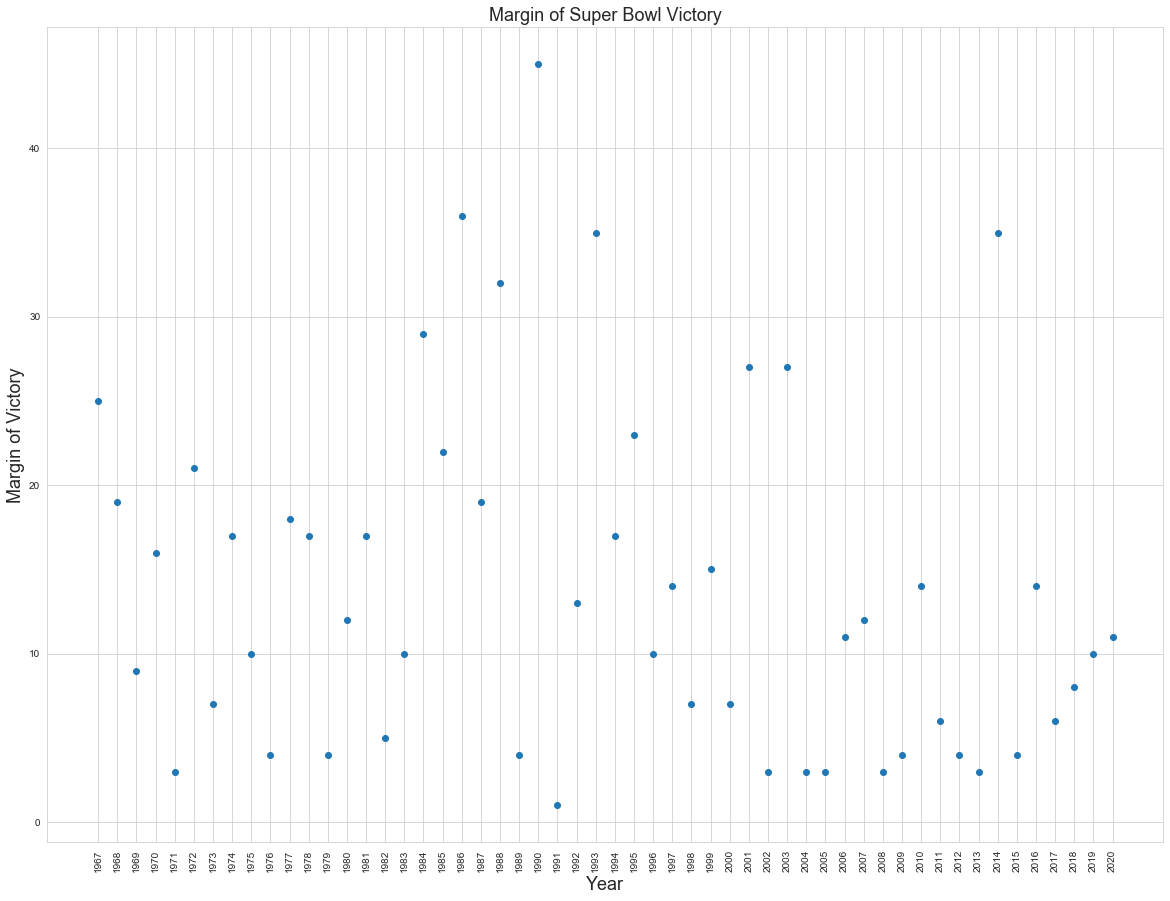

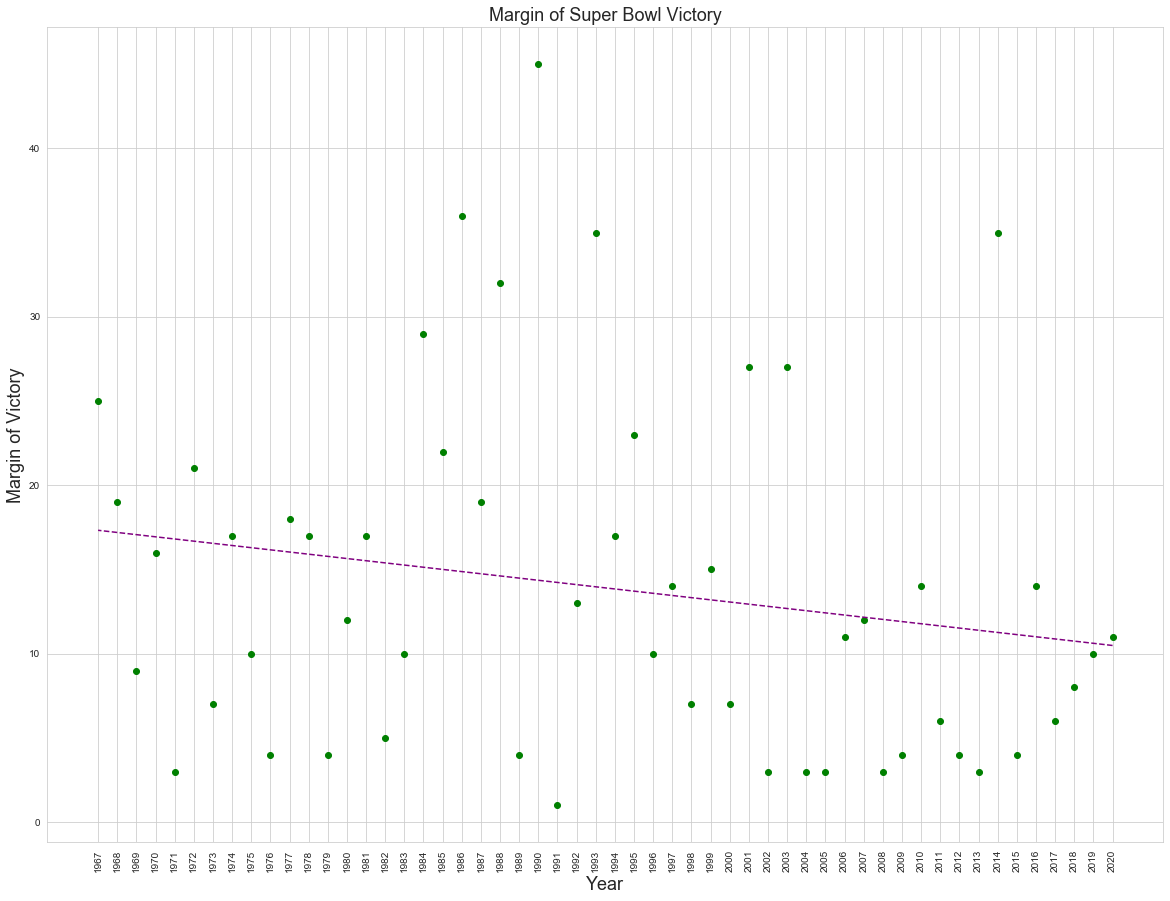

In [28]:
year = df.iloc[:,0]
margin = (df.iloc[:,(3)]-df.iloc[:,(5)])
plt.figure(figsize=(20,15))
plt.scatter(year, margin)
plt.title("Margin of Super Bowl Victory", fontsize=18)
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Margin of Victory', fontsize=18)
plt.show()

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, margin)
vc_fit = vc_slope * year + vc_int

year = df.iloc[:,0]
margin = (df.iloc[:,(3)]-df.iloc[:,(5)])
plt.figure(figsize=(20,15))
plt.scatter(year, margin, color="green")
plt.title("Margin of Super Bowl Victory", fontsize=18)
plt.plot(year,vc_fit,"--", color="purple")
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Margin of Victory', fontsize=18)

plt.show()

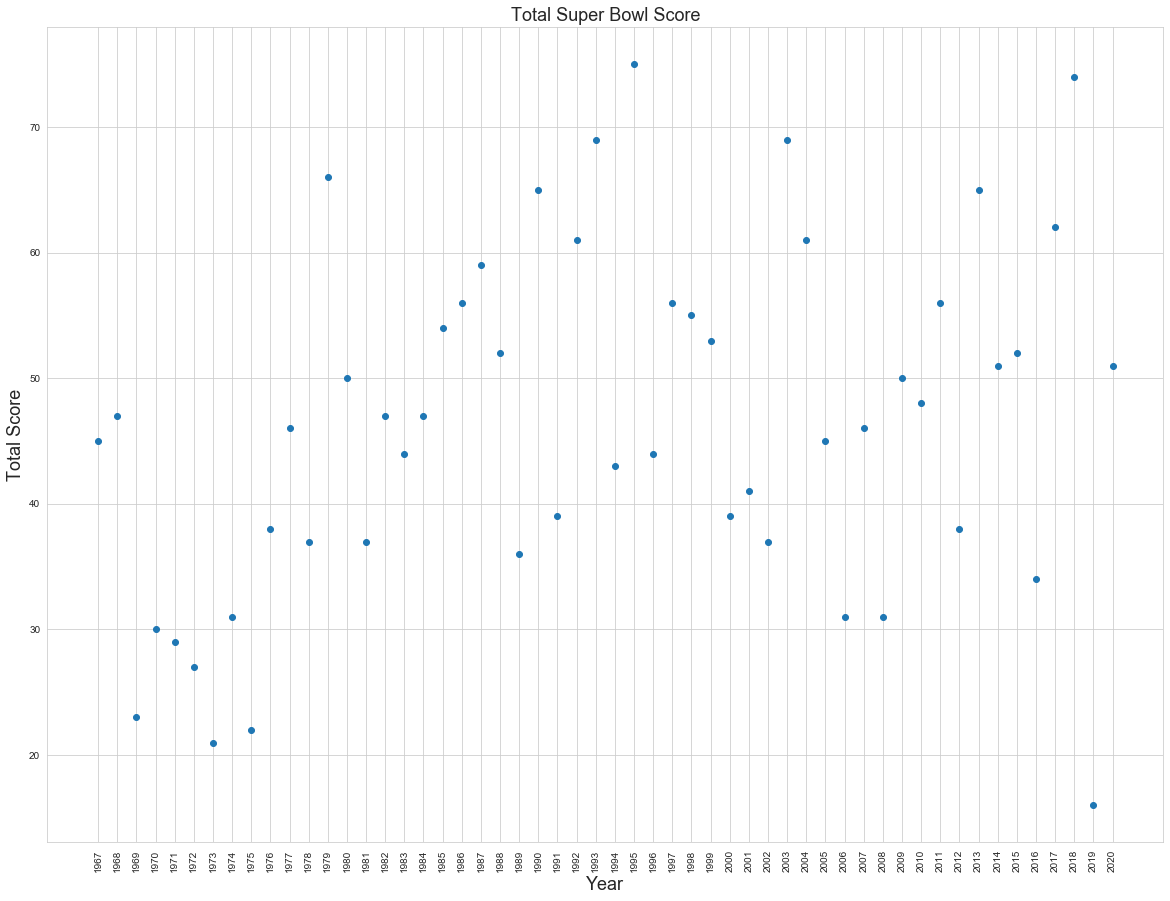

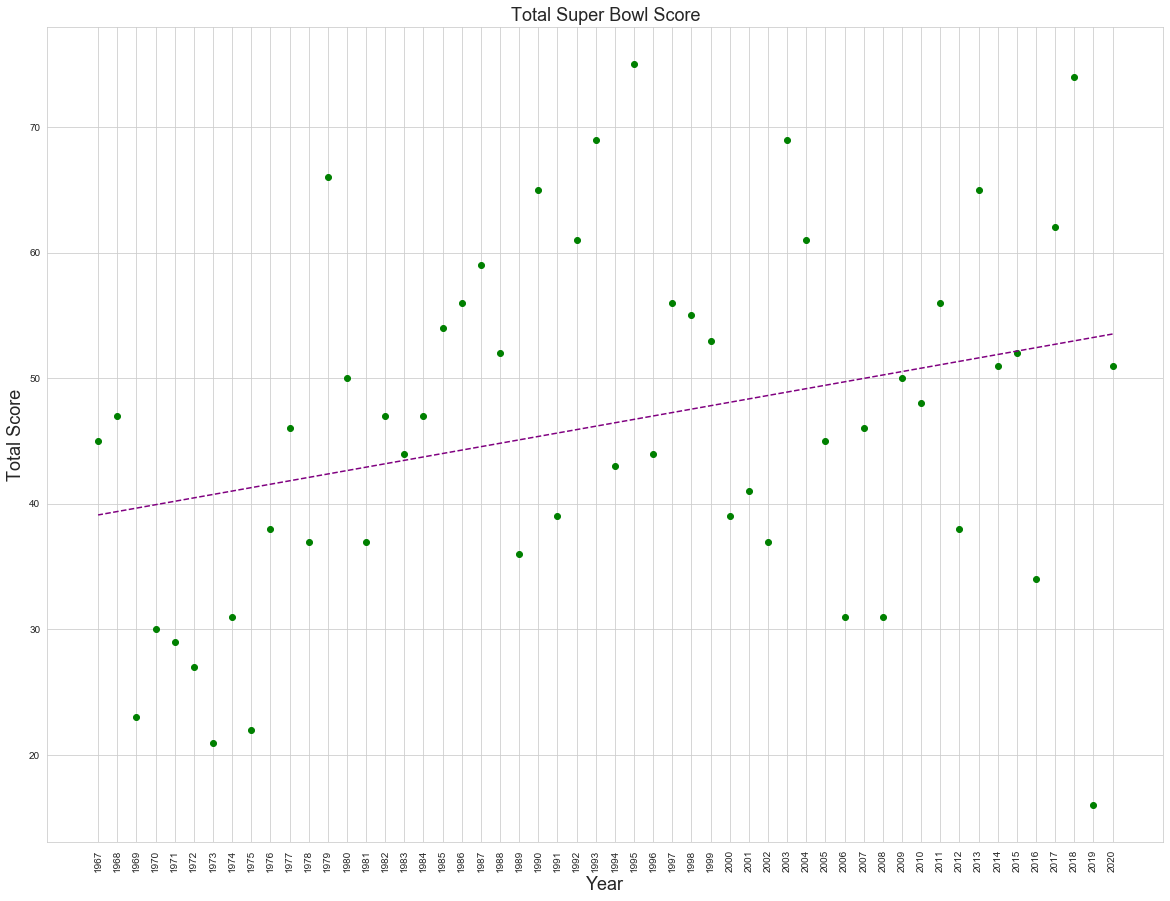

In [25]:
year = df.iloc[:,0]
margin = (df.iloc[:,(3)]+df.iloc[:,(5)])
plt.figure(figsize=(20,15))
plt.scatter(year, margin)
plt.title("Total Super Bowl Score", fontsize=18)
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Score', fontsize=18)
plt.show()

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, margin)
vc_fit = vc_slope * year + vc_int

year = df.iloc[:,0]
margin = (df.iloc[:,(3)]+df.iloc[:,(5)])
plt.figure(figsize=(20,15))
plt.scatter(year, margin, color="green")
plt.title("Total Super Bowl Score", fontsize=18)
plt.plot(year,vc_fit,"--", color="purple")
plt.xticks(year, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Score', fontsize=18)

plt.show()